In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import  scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
X = df.iloc[:,[3,4]].values

In [5]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter=300,random_state=1)
    km.fit(X)
    wcss.append(km.inertia_)
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30566.45113025185,
 25005.55037243283,
 21996.523372372307,
 19746.91195766089]

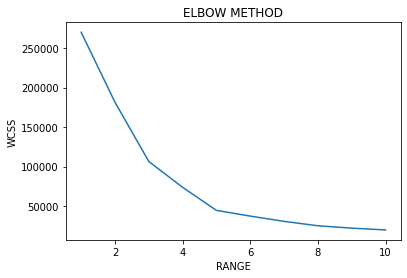

In [6]:
plt.plot(range(1,11),wcss)
plt.xlabel('RANGE')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In [7]:
y_means = KMeans(n_clusters=5)
y_pred = y_means.fit_predict(X)
y_pred

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

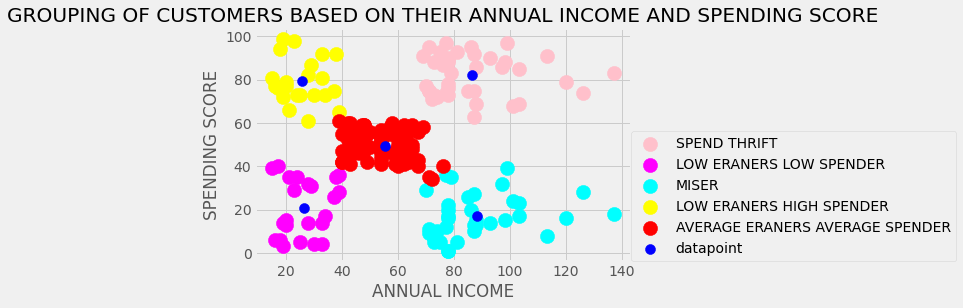

In [12]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.scatter(X[y_pred == 0,0],X[y_pred == 0,1],s=200,color = 'pink',label ='SPEND THRIFT')
plt.scatter(X[y_pred == 1,0],X[y_pred == 1,1],s=200,color = 'magenta',label = 'LOW ERANERS LOW SPENDER')
plt.scatter(X[y_pred == 2,0],X[y_pred == 2,1],s=200,color = 'cyan',label = 'MISER')
plt.scatter(X[y_pred == 3,0],X[y_pred == 3,1],s=200,color = 'yellow',label = 'LOW ERANERS HIGH SPENDER')
plt.scatter(X[y_pred == 4,0],X[y_pred == 4,1],s=200,color = 'red',label = 'AVERAGE ERANERS AVERAGE SPENDER')
plt.scatter(y_means.cluster_centers_[:,0],y_means.cluster_centers_[:,1],s=100,c='blue',label='datapoint')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON THEIR ANNUAL INCOME AND SPENDING SCORE')
plt.legend(loc=[1,0])
plt.show()

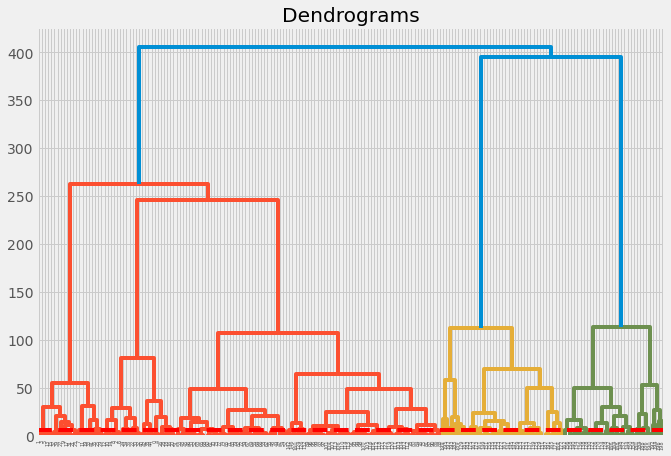

In [18]:
plt.figure(figsize=(10,7))
plt.title('Dendrograms')
dend = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.axhline(y=6,color='red',linestyle = '--')

In [19]:
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred2 = cluster.fit_predict(X)
y_pred2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

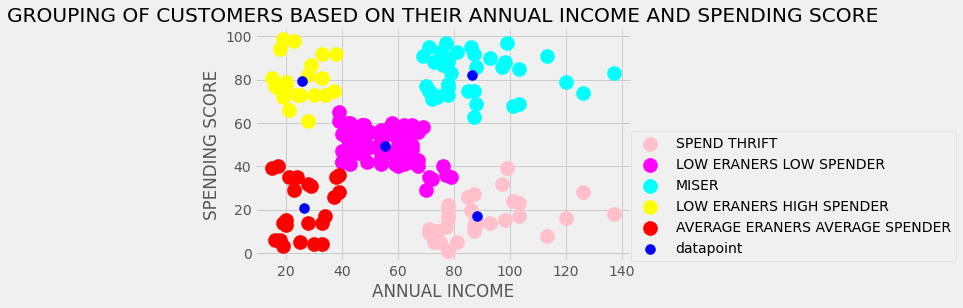

In [20]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.scatter(X[y_pred2 == 0,0],X[y_pred2 == 0,1],s=200,color = 'pink',label ='SPEND THRIFT')
plt.scatter(X[y_pred2 == 1,0],X[y_pred2 == 1,1],s=200,color = 'magenta',label = 'LOW ERANERS LOW SPENDER')
plt.scatter(X[y_pred2 == 2,0],X[y_pred2 == 2,1],s=200,color = 'cyan',label = 'MISER')
plt.scatter(X[y_pred2 == 3,0],X[y_pred2 == 3,1],s=200,color = 'yellow',label = 'LOW ERANERS HIGH SPENDER')
plt.scatter(X[y_pred2 == 4,0],X[y_pred2 == 4,1],s=200,color = 'red',label = 'AVERAGE ERANERS AVERAGE SPENDER')
plt.scatter(y_means.cluster_centers_[:,0],y_means.cluster_centers_[:,1],s=100,c='blue',label='datapoint')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING SCORE')
plt.title('GROUPING OF CUSTOMERS BASED ON THEIR ANNUAL INCOME AND SPENDING SCORE')
plt.legend(loc=[1,0])
plt.show()